<a href="https://colab.research.google.com/github/warwavn/AI-SUT2025/blob/main/Day%2011%20CNN/D11_pillQC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown 1T5_yXlkJy7Md_oiwHarAZKaKUaxovMb4

Downloading...
From: https://drive.google.com/uc?id=1T5_yXlkJy7Md_oiwHarAZKaKUaxovMb4
To: /content/pill_classes.zip
100% 2.85M/2.85M [00:00<00:00, 205MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile(r"/content/pill_classes.zip","r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.0/255,validation_split = 0.2)                                   #normalize divided by 255 by in factor format, split val

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.0/255)

In [ ]:
train_dir = "/content/pill_classes/train"
test_dir = "/content/pill_classes/test"
bs = 32

tf.random.set_seed(42)                                                                                #get same random?
train_data = train_datagen.flow_from_directory(train_dir , batch_size = bs,target_size = (224,224),    #standard size
                                               class_mode = 'categorical',                                 #or categorical for multiclass
                                               subset = 'training')                                   #to identify training and validation

val_data = train_datagen.flow_from_directory(train_dir , batch_size = bs,target_size = (224,224),
                                               class_mode = 'categorical',
                                               subset = 'validation')
test_data = test_datagen.flow_from_directory(test_dir, batch_size = bs,target_size = (224,224),
                                               class_mode = 'categorical')

Found 212 images belonging to 3 classes.
Found 52 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Flatten())

#Classification layer
model.add(tf.keras.layers.Dense(200,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(3,activation='softmax')) #3 class

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6)

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(0.001),
              metrics= ['accuracy','precision'])

In [ ]:
hist = model.fit(train_data, epochs = 20, steps_per_epoch= len(train_data),
                 validation_data = val_data, validation_steps = len(val_data))

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 554ms/step - accuracy: 0.3454 - loss: 1.4781 - precision: 0.3177 - val_accuracy: 0.5192 - val_loss: 0.9485 - val_precision: 0.0000e+00
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.5068 - loss: 0.9507 - precision: 0.5333 - val_accuracy: 0.4615 - val_loss: 0.9135 - val_precision: 0.4800
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6838 - loss: 0.6958 - precision: 0.7475 - val_accuracy: 0.8077 - val_loss: 0.5203 - val_precision: 0.8667
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.7676 - loss: 0.5019 - precision: 0.8707 - val_accuracy: 0.6923 - val_loss: 0.6135 - val_precision: 0.7000
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.9053 - loss: 0.2354 - precision: 0.9134 - val_accuracy: 0.8462 - val_loss: 0.3363 - val_precision: 0.8431
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.9824 - loss: 0.0864 - precision: 0.9823 - val_accuracy: 0.7692 - val_loss: 0.4957 - 

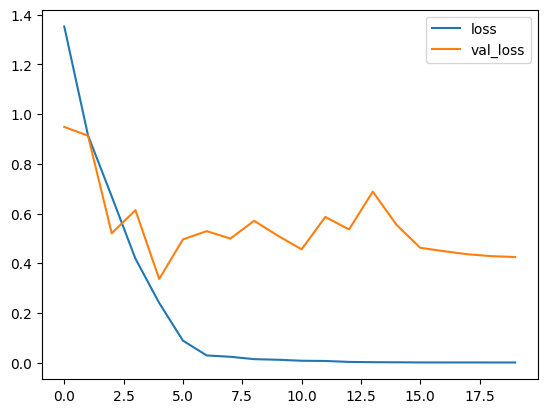

In [ ]:
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.legend()

Test

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
train_data.class_indices

{'chip': 0, 'dirt': 1, 'normal': 2}

In [ ]:
# img_path = "/content/pizza_steak/test/pizza/1183595.jpg"
# img = image.load_img(img_path, target_size = (224,224))
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis = 0)
# img_array /= 255.0

# prediction = model.predict(img_array).flatten()
# class_names = ['chip','dirt','normal']

# plt.imshow(img)
# plt.title(f"Predicted: {[prediction[0]]}")
# plt.axis("off")
# plt.show()

In [ ]:
import os
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
test_dir = "/content/pill_classes/test"
class_names = ['chip','dirt','normal']
y_true = []
y_pred = []

for class_name in class_names:
  class_folder = os.path.join(test_dir,class_name)
  for img_name in os.listdir(class_folder):
    img_path = os.path.join(class_folder, img_name)
    img = image.load_img(img_path, target_size = (224,224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis = 0)
    img_array /= 255.0
    res = model.predict(img_array).flatten()

    pred_class = np.argmax(res)

    actual_class = class_names.index(class_name)
    y_true.append(actual_class)
    y_pred.append(pred_class)

accuracy = accuracy_score(y_true,y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━

In [ ]:
print(f"Test Accuracy is: {accuracy}")

Test Accuracy is: 1.0


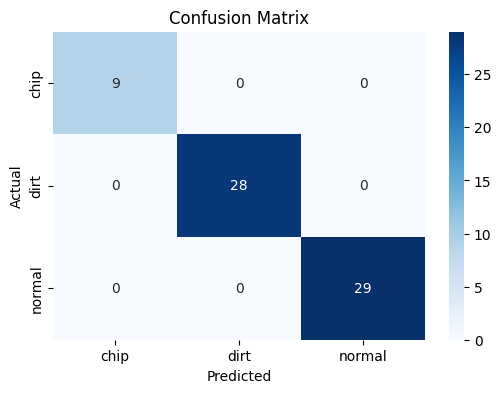

In [ ]:
from sklearn.metrics import confusion_matrix
cmfx = confusion_matrix(y_true,y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cmfx, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()